In [25]:
#importing all the basic libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib as mpt
%matplotlib inline
import matplotlib.pyplot as plt

In [122]:
#load data into pandas datframe to see the structure of the data and analyze it
#skipping completely balnk lines and ignoring the lines with not having proper format
meal_data = pd.read_csv('C:/Users/bnaveen3/Desktop/AV/GP/train.csv',skip_blank_lines=True,
                      error_bad_lines=False)
meal_info = pd.read_csv('C:/Users/bnaveen3/Desktop/AV/GP/meal_info.csv',skip_blank_lines=True,
                      error_bad_lines=False)
#Loading historical logics to check if this is useful
center_info = pd.read_csv('C:/Users/bnaveen3/Desktop/AV/GP/fulfilment_center_info.csv',skip_blank_lines=True,
                      error_bad_lines=False)

In [123]:
meal_info.set_index('meal_id',inplace=True)
center_info.set_index('center_id',inplace=True)


In [124]:
meal_train_data=meal_data.join(meal_info[['category','cuisine']],on=['meal_id'],rsuffix='_meal_info')
meal_train_data=meal_train_data.join(center_info,on=['center_id'],rsuffix='_center_info')

In [125]:
print(meal_train_data.columns)
print(len(meal_data))
print(len(meal_train_data))
meal_train_data.drop(['meal_id','center_id'],axis=1,inplace=True)

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')
456548
456548


In [6]:
#meal_train_data.tail()
#pd.unique(meal_train_data['city_code'])
#pd.unique(meal_train_data['region_code'])
#pd.unique(meal_train_data['center_type'])
meal_train_data.isna()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
meal_train_data =pd.get_dummies(meal_train_data)

In [8]:
print(meal_train_data.columns)

Index(['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'num_orders', 'city_code', 'region_code',
       'op_area', 'category_Beverages', 'category_Biryani', 'category_Desert',
       'category_Extras', 'category_Fish', 'category_Other Snacks',
       'category_Pasta', 'category_Pizza', 'category_Rice Bowl',
       'category_Salad', 'category_Sandwich', 'category_Seafood',
       'category_Soup', 'category_Starters', 'cuisine_Continental',
       'cuisine_Indian', 'cuisine_Italian', 'cuisine_Thai',
       'center_type_TYPE_A', 'center_type_TYPE_B', 'center_type_TYPE_C'],
      dtype='object')


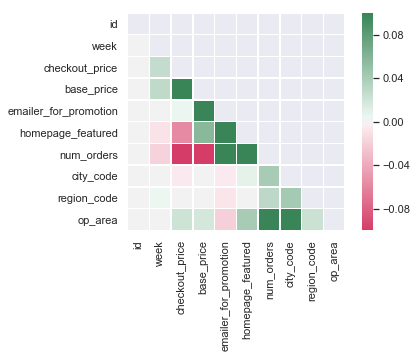

In [8]:
import seaborn as sns
sns.set(style="white")
cmap = sns.diverging_palette(1, 140, as_cmap=True)
corr=meal_train_data[['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'num_orders', 'city_code', 'region_code',
       'op_area']].corr()
#corr=meal_train_data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(rc={'figure.figsize':(6,4)})
sns.heatmap(corr,cmap=cmap, vmax=0.1, center=0,vmin=-.1,mask=mask,
            square=True, linewidths=.5, cbar_kws={"shrink": 1})
#corr

In [93]:
from sklearn.model_selection import train_test_split
a, b = train_test_split(meal_train_data['checkout_price'][0:1000], test_size=0.1)

In [94]:
#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
from scipy import stats
## Cross Checking with the internal scipy function
t, p = stats.ttest_ind(a,b,equal_var=False)#independent non paired
t1,p1=stats.ttest_1samp(a,b.mean())#if p value is less than .05 then it means these two have different mean(mean is far)
t2,p2=stats.ttest_rel(a,b)#paired same data at diff observations(need to be equal no of records)
print("t = " + str(t))
print("p = " + str(p))
print("t1 = " + str(t1))
print("p1 = " + str(p1))
print("t2 = " + str(t2))
print("p2 = " + str(p2))
print(a.mean(),b.mean())
print('var',np.sqrt(a.var()),np.sqrt(b.var()))

t = -0.7047938104019323
p = 0.48224199642533305
t1 = -2.0922292589965523
p1 = 0.03669797737981543
t2 = -1.7410488230778933
p2 = 0.08795116049125393
326.6053 337.1268
var 150.8653980641613 140.55966851803183


In [118]:
from scipy import stats
stats.chisquare([1, 2, 0, 1, 0, 2], f_exp=[1, 2, 9, 1, 1, 2])
stats.chi2_contingency([[1, 2, 9, 1, 1, 2],[1, 2, 9, 1, 1, 2]])

(0.0, 1.0, 5, array([[1., 2., 9., 1., 1., 2.],
        [1., 2., 9., 1., 1., 2.]]))

In [139]:
meal_train_data.head()
crosstab=pd.crosstab(meal_train_data['category'],meal_train_data['cuisine'])
crosstab
stats.chi2_contingency(crosstab)
#crosstab.shape
crosstab

cuisine,Continental,Indian,Italian,Thai
category,,,,
Beverages,32554,29296,33381,32659
Biryani,0,20614,0,0
Desert,0,29294,0,0
Extras,0,0,0,13562
Fish,10187,0,0,0
Other Snacks,0,0,0,29379
Pasta,0,0,27694,0
Pizza,33138,0,0,0
Rice Bowl,0,33408,0,0


In [140]:
meal_train_data.columns

Index(['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code',
       'region_code', 'center_type', 'op_area'],
      dtype='object')

In [ ]:
for i in [['week','op_area']]:
    meal_train_data[i].plot.box()


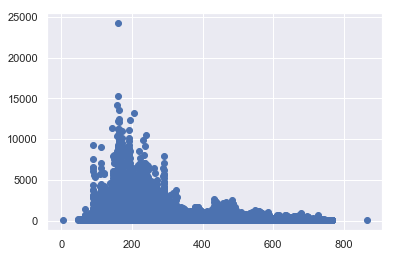

In [16]:
#sns.relplot(x="checkout_price", y="num_orders", col="checkout_price",
 #           hue="checkout_price",
  #          data=meal_train_data[['checkout_price','num_orders']])
plt.scatter(meal_train_data['checkout_price'],meal_train_data['num_orders'])

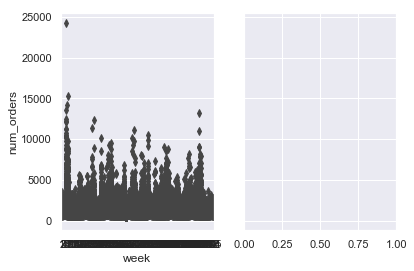

In [20]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(x='week',y="num_orders", data=meal_train_data, ax=axes[0])

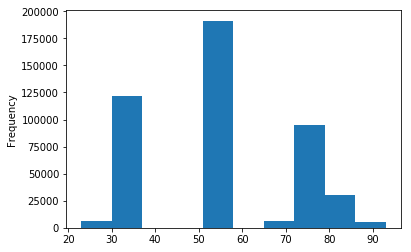

In [8]:
#meal_train_data['emailer_for_promotion']
#plt.scatter(meal_train_data['base_price'],meal_train_data['num_orders'],c='green')
meal_train_data['region_code'].plot.hist()
#meal_train_data['city_code'].plot.box()
#pd.unique(meal_train_data['city_code'])

In [9]:
#np.cov(meal_train_data)
meal_train_data.drop(['id'],axis=1,inplace=True)
meal_train_data.head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,category_Beverages,...,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C
0,1,136.83,152.29,0,0,177,647,56,2.0,1,...,0,0,0,0,0,0,1,0,0,1
1,1,136.83,135.83,0,0,270,647,56,2.0,1,...,0,0,0,0,0,0,1,0,0,1
2,1,134.86,135.86,0,0,189,647,56,2.0,1,...,0,0,0,0,0,0,1,0,0,1
3,1,339.50,437.53,0,0,54,647,56,2.0,1,...,0,0,0,0,1,0,0,0,0,1
4,1,243.50,242.50,0,0,40,647,56,2.0,1,...,0,0,0,0,1,0,0,0,0,1


In [97]:
#Handle the Null values and fit the data
#check_for_null_values(AMEX_TRAIN_DATA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(meal_train_data)
meal_train_data_std=scaler.transform(meal_train_data)

In [11]:
#np.cov(meal_train_data)
#meal_train_data_std
len(meal_train_data)

456548

In [10]:
#having a 20% of test data
from sklearn.model_selection import train_test_split
meal_train_data, meal_test_data = train_test_split(meal_train_data, test_size=0.1)

In [13]:
#np.cov(meal_test_data)

#meal_test_data=np.sqrt(meal_test_data)
#meal_train_data.head()
meal_train_data.columns

Index(['week', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'num_orders', 'city_code', 'region_code',
       'op_area', 'category_Beverages', 'category_Biryani', 'category_Desert',
       'category_Extras', 'category_Fish', 'category_Other Snacks',
       'category_Pasta', 'category_Pizza', 'category_Rice Bowl',
       'category_Salad', 'category_Sandwich', 'category_Seafood',
       'category_Soup', 'category_Starters', 'cuisine_Continental',
       'cuisine_Indian', 'cuisine_Italian', 'cuisine_Thai',
       'center_type_TYPE_A', 'center_type_TYPE_B', 'center_type_TYPE_C'],
      dtype='object')

In [11]:
meal_train_target=meal_train_data['num_orders']
meal_train_data.drop(['num_orders'],axis=1,inplace=True)
meal_test_target=meal_test_data['num_orders']
meal_test_data.drop(['num_orders'],axis=1,inplace=True)

In [98]:
#np.cov(meal_test_data)
#test=meal_test_data[['week','checkout_price']]
cov=np.cov(meal_train_data[['week', 'op_area','checkout_price', 
       'homepage_featured','city_code','region_code'
       ]].T)
#len(test)
cov#.shape
print(meal_train_data.columns)
eigen_data=np.linalg.eig(cov)
eigen_values =eigen_data[0]
print('eigen_values-',eigen_values)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [104]:
import seaborn as sns
sns.set(style="white")
corr=meal_data[['num_orders','week', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured',
       'op_area']].corr()
sns.heatmap(corr)

KeyError: "['op_area'] not in index"

(6, 6)

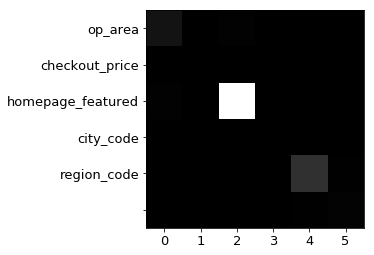

In [96]:
fig = plt.figure()
fig.figsize=(100,50)
ax1 = fig.add_subplot(111)

labels=['week', 'op_area','checkout_price', 'homepage_featured','city_code','region_code']
ax1.set_xticklabels(labels,fontsize=13)
ax1.set_yticklabels(labels,fontsize=13)

#ax1.grid(b=True,axis='both',which='both')

#cov_plot=ax1.imshow(cov,cmap='winter')
#plt.show()
plt.imshow(cov,cmap='gray')
#cov=cov/cov.max()
#fig.colorbar(cov_plot)
#plt.imshow(cov,cmap='winter')
#plt.colorbar()
plt.xscale('linear')
cov.shape

In [56]:
#trying different iterations
meal_train_data

In [20]:
#Fit the model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=20)
model.fit(meal_train_data,meal_train_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [70]:
data_zip=zip(meal_train_data.columns,model.feature_importances_*100)
imp=pd.DataFrame(dict(feature=meal_train_data.columns,score=model.feature_importances_*100))
imp.sort_values(by=['score'],ascending=False,inplace=True)
imp[imp['score']>0.5]

,feature,score
1,checkout_price,23.738887
7,op_area,13.025434
2,base_price,9.813082
0,week,8.828743
4,homepage_featured,8.666299
16,category_Rice Bowl,8.633291
5,city_code,5.442825
18,category_Sandwich,4.682101
3,emailer_for_promotion,3.876463
24,cuisine_Italian,2.529678


In [35]:
#print(model.predict(meal_test_data[:10]))
#meal_test_target[:10]
model.score(meal_test_data,meal_test_target)
predict_targetmodel
plt.scatter(meal_test_target)

0.8070027852708052

In [80]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier()

In [ ]:
model_xgb.fit(meal_train_data,meal_train_target)

In [78]:
from sklearn.linear_model import LinearRegression
model_lin=LinearRegression(fit_intercept=False,normalize=True)
model_lin.fit(meal_train_data,meal_train_target)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=True)

In [79]:
model_lin.score(meal_test_data,meal_test_target)

0.40789194154668484